---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 1 Modelo 0 dimensional </font>**
### **<font color="DodgerBlue"> Notebook 1: Introducción a Python y leyes de radiación </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

El primer tema del curso concierne al modelo de clima más sencillo, el modelo de cero dimensiones. Este modelo busca obtener la temperatura de equilibrio de un planeta a una cierta distancia de su estrella. 

Para este tema es importante entender:

- Bases de radiación solar y terrestre: 
    - Ley de Planck y de Stefan Boltzmann. 
    - Ley de Wien. 
- Modelo de orden 0. 
    - Solución básica.
    - Rol del albedo y del efecto invernadero en el clima a través del modelo. 
    - Importancia del espesor atmosférico a través del número de capas en el modelo.
    
Antes de empezar el curso, es importante conocer los paquetes, o librerìas, básicos que usaremos durante el curso. 

- `numpy`: Librería principal de matemáticas y cómputo científico. Permite crear arreglos, que pueden ser conceptualizados como vectores (1D) o matrices (N dimensiones). https://numpy.org/
- `matplotlib`: Librería principal de gráficas y visualización de datos en Python. Permite generar mapas, gráficos de línea, de barras, etc. https://matplotlib.org/
- `pandas`: Pandas es una librería para analizar datos en formato de tablas. Su uso permite el análisis exhaustivo de bases de datos con flexibilidad y una sintaxis fácil de entender en un tiempo relativamente corto. https://pandas.pydata.org/

Estas tres librerías son utilizadas como base de muchas actividades que involucran programación, no sólo de las Ciencias de la Tierra por lo que dominar estos paquetes resulta clave para profesionistas fuera y dentro de la academia. 

In [101]:
# Modulos basicos: numpy, pandas, matplotlib y pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 

El flujo de este notebook tratará de ir de menos a más, computacionalmente hablando tratando de mantener cierto hilo con los temas vistos en la clase teórica, pero no por ello en estricto orden. Por ejemplo, empecemos por la ley de Wien, que no es la primera que se ve pero sí es fácil de escribir en una función. 

La ley de Wien nos dice que la longitud de onda donde ocurre el máximo de emisión de energía electromagnética de un cuerpo negro, en particular, el máximo de la función de Planck $B$, está dado por la siguiente ecuación: 

\begin{align}
\lambda_{max}=\frac{b}{T}
\end{align}

donde $b$ es la constante de desplazamiento de Wien y equivale a 0.0028976 m$\cdot$K y T es la temperatura en K.

En la siguiente celda buscamos calcular esta función para diferentes valores de temperatura. Para esto utilizaremos `numpy` que nos permite crear arreglos (*arrays* de ahora en adelante).  

Por ejemplo, la función arange crea arreglos en intervalos de 1 unidad entre un valor inicial y un valor final (https://numpy.org/doc/stable/reference/generated/numpy.arange.html) aunque también se puede cambiar el valor del intervalo por cualquier número real.

Por si no sabemos crear funciones, su utilidad y su sintaxis: https://www.w3schools.com/python/python_functions.asp

In [102]:
# crear un arreglo de numpy 
T = np.arange(200,500)
print(type(T))
#crear una funcion 
def wien(T):
    #T es el argumento de la funcion
    b=0.0028976
    lamda_max=b/T
    # lamda_max es la salida de la funcion
    return lamda_max
# guardamos el resultado de esta funcion en una variable T
lambda_max=wien(T)

<class 'numpy.ndarray'>


La función anterior obtiene un valor de lambda para cada T que utilizamos. Esto lo podríamos graficar. Vamos a hacer nuestra primer gráfica. Para esto utilizaremos la función de pyplot `plot`, la cual se utiliza para hacer gráficos de línea.

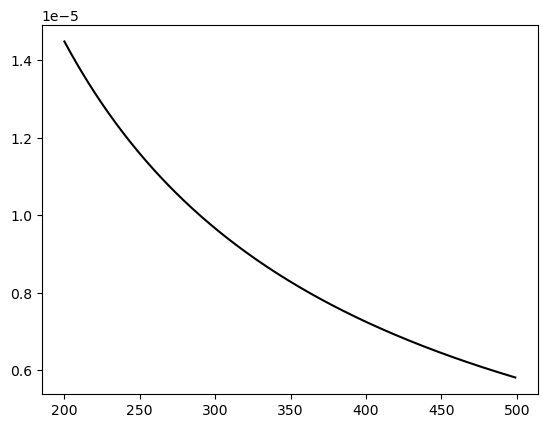

In [103]:
plt.plot(T,lambda_max,c='k')

La gráfica está un poco escueta y podría ser más digerible. 

Algunas características básicas de un gráfico son:

- Nombres en los ejes
- Centrar la gráfica delimitando los límites. 
- Aumentar el tamaño de alguna letra
- Algo más?

En la siguiente celda, creamos una función que toma argumentos por *default* y argumentos *posicionales*. Los argumentos por default se tienen que declarar al momento de usar la función sí o sí, siempre. Los argumentos posicionales pueden o no ser utilizados. Es decir la función puede cambiar los valores que se indican en la declaración de la función o usar otros. 

En el siguiente caso los argumentos por default son `xmin` y `xmax` y los posicionales son `ymin` y `ymax`. 

In [104]:
def lineplot_setup(xmin,xmax,ymin=None,ymax=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

Ahora vamos a utilizar la función utilizando valores razonables. Para la temperatura es fácil porque nosotros definimos el vector `T`. Para saber valores posiblemente buenos de $\lambda$ utilizamos las funciones más utilizadas de `numpy`, max y min. Estas funciones nos da, como intuitivamente podemos adivinar, los máximos y mínimos del vector. 

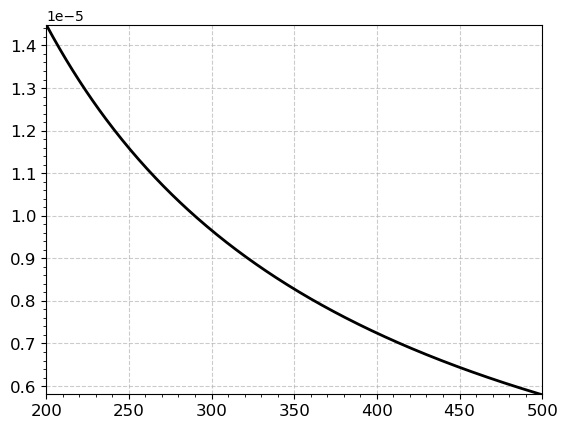

In [105]:
plt.plot(T,lambda_max,c='k',linewidth=2)
# xmin, xmax ymin y ymax delimitan el rango visual del grafico, o la extension
lineplot_setup(xmin=200,xmax=500,ymin=np.min(lambda_max),ymax=np.max(lambda_max))

En esa primer versión utilizamos la función utilizando todos los argumentos, pero ¿qué pasa si no utilizamos los argumentos posicionales?

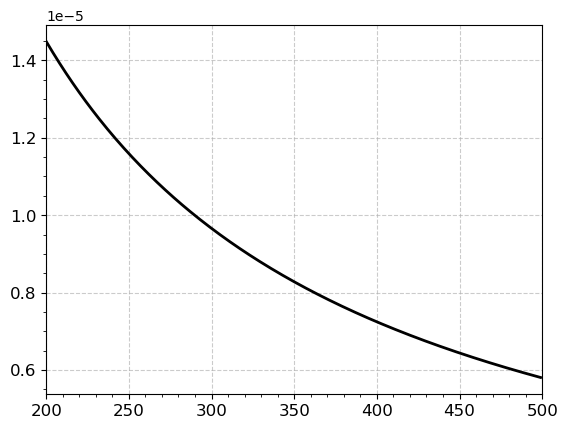

In [106]:
plt.plot(T,lambda_max,c='k',linewidth=2)
# xmin, xmax ymin y ymax delimitan el rango visual del grafico, o la extension
lineplot_setup(xmin=200,xmax=500)#ymin=np.min(lambda_max),ymax=np.max(lambda_max))

Todavía nos faltan varias cosas para que quede al 100, entre ellas el título a los ejes y a la gráfica. Hagamos obligatorio el nombre de los ejes `xlabel` y `ylabel` pero opcional, o posicional, el título de la gráfica. Es importante destacar que los argumentos obligatorios tienen que indicarse en el orden correcto al momento de utilizar la función mientras que los posicionales no. Del mismo modo, los argumentos obligatorios pueden usarse sin el nombre del argumento mientras que los posicionales requieren el nombre a menos que se utilicen todos los argumentos y en el orden correcto.

In [107]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

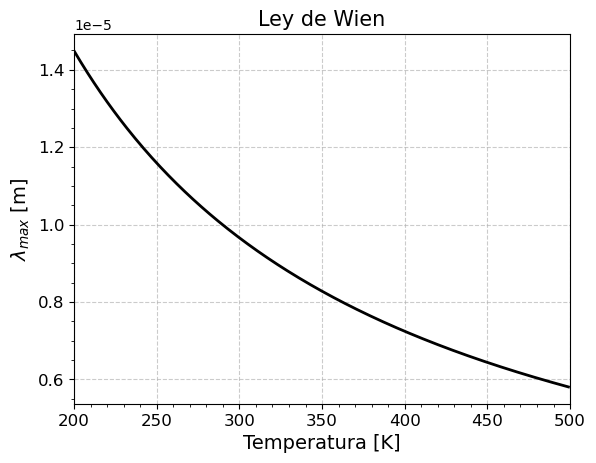

In [108]:
plt.plot(T,lambda_max,c='k',linewidth=2)
# el valor de y min lo especificamos acorde a lo que vamos a graficar, en particular a sus 
# valores minimos y maximos
ymin=np.min(lambda_max)
ymax=np.max(lambda_max)
# xmin, xmax ymin y ymax delimitan el rango visual del grafico, o la extension
lineplot_setup(200,500,xlab='Temperatura [K]',ylab=r'$\lambda_{max}$ [m]',title='Ley de Wien')


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1 - Graficar una función usando nuestra función de graficado </font>**

<font color="DarkBlue"> 1. Grafique una función que usted desee, polinomial o trigonométrica en un intervalo razonable y utilice nuestra función `lineplot_setup` para mejorarla.
    
---

Ahora regresemos a las ecuaciones que nos atañen, sigue la función de Planck la cuál es un poco más complicada. 

Esta ecuación nos dice cómo cambia la irradiancia para un número de onda, o longitud de onda, y una temperatura T. Para esto utilizaremos una función que calcule la función de Planck $B$ utilizando un vector de longitud de onda para una temperatura fija o sea que T será un objeto del tipo flotante (`np.float`). 

La función de Planck está dada por:

\begin{align}
B(\lambda,T)=\frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{kT\lambda}}-1}
\end{align}



La función que utilizaremos vamos a documentarla adecuadamente con la sintaxis más adecuada para documentar una función en Python. A este tipo de comentarios se les conoce como "docstrings" o cadenas del documento, que nos permiten tener un código más claro en cuanto a las características de cada función, argumento y salida (Return). Aunque parezca dar mucha lata, este tipo de documentación permite que otros interprétes (como github o Sphinx) puedan convertir este texto a un formato más bonito (ver )

In [109]:
def B(lambda_array,T):
    """
    ** Función de Planck **

    *Parameters*

    lamda_array: `np.array`
        Arreglo de numpy de los valores de longitud de onda. 
    T: `float`
        Valor flotante, número real, de la temperatura en K.

    .. nota::

        Esta función calcula la función de Planck para un arreglo continuo de valores de longitud de onda
        y para una temperatura específica

    *Returns*
        B: `np.array` La irradiancia, o flujo espectral de un cuerpo negro con temperatura T.
        Unidades: W m$^{-2}$ m$^{-1}$.

    """
    h=6.626e-34
    c=299792458
    k=1.3806849e-23
    term1=2*h*(c**2)/(lambda_array**5)
    term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
    B=term1*term2
    return B

¿Cómo podemos estar segurxs de que la función está bien?

¡Con otra gráfica!

En este caso, vamos a generar otra gráfica, pero utilizando diferentes temperaturas y observando las diferencias. Para esto primero, hay que definir nuestro vector de longitudes de onda. Las longitudes de onda de interés son muyy pequeñas, estamos hablando de radiación en el orden de nanómetros y menor. 

Específicamente las temperaturas que vamos a analizar son temperaturas parecidas a las del Sol (5772 $K$). Vamos a analizar diferencias de temperatura del orden de magnitud de la temperatura terrestre $\sim$ 300 $K$

/tmp/ipykernel_7314/1359551474.py:25: RuntimeWarning: divide by zero encountered in divide
  term1=2*h*(c**2)/(lambda_array**5)
/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: divide by zero encountered in divide
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: overflow encountered in exp
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
/tmp/ipykernel_7314/1359551474.py:27: RuntimeWarning: invalid value encountered in multiply
  B=term1*term2


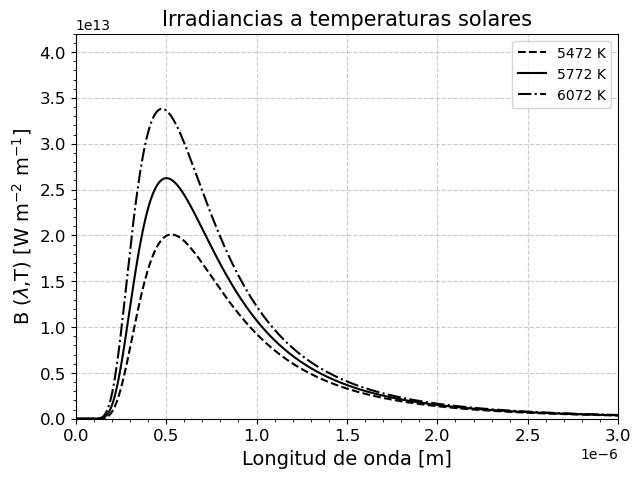

In [110]:
# resolución de 1 nanómetro para resolver la función de Planck
resolution=1e-10
# maxima longitud de onda = 300 micrometers
max_lambda=3e-6
# creacion de arreglo de longitud de onda
lambda_vec=np.arange(0,max_lambda,resolution)

# creamos un objeto de figura, con tamaño (figsize) y resolución específica.
plt.figure(figsize=(7,5),dpi=100)
plt.plot(lambda_vec,B(lambda_vec,5472),c='k',linestyle='--',label='5472 K')
plt.plot(lambda_vec,B(lambda_vec,5772),c='k',linestyle='-',label='5772 K')
plt.plot(lambda_vec,B(lambda_vec,6072),c='k',linestyle='-.',label='6072 K')
lineplot_setup(0,max_lambda,xlab='Longitud de onda [m]',ylab='B ($\lambda$,T) [W m$^{-2}$ m$^{-1}$]',
               ymin=0,ymax=4.2e13,title='Irradiancias a temperaturas solares')
# agregar leyenda, o sea que podamos distinguir las lineas graficadas
plt.legend()
# Salvar la figura con el nombre de archivo B_sol.png
plt.savefig('B_sol.png')


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 2 - Graficar la función de Planck </font>**

<font color="DarkBlue"> 1. Grafique la función de Planck para la temperatura promedio de un desierto 320 K, la promedio terrestre 288 K y los polos durante el invierno 260 K. 
    
   
<font color="DarkBlue"> 2. Luego haga una gráfica de la diferencia entre las curvas del desierto y los polos con respecto al promedio. ¿Qué diferencias observa?

---

Ahora supongamos que por alguna razón queremos graficar ambos espectros de irradiancia, el del Sol y el de la Tierra. Directamente sería algo así:

/tmp/ipykernel_7314/1359551474.py:25: RuntimeWarning: divide by zero encountered in divide
  term1=2*h*(c**2)/(lambda_array**5)
/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: divide by zero encountered in divide
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: overflow encountered in exp
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
/tmp/ipykernel_7314/1359551474.py:27: RuntimeWarning: invalid value encountered in multiply
  B=term1*term2


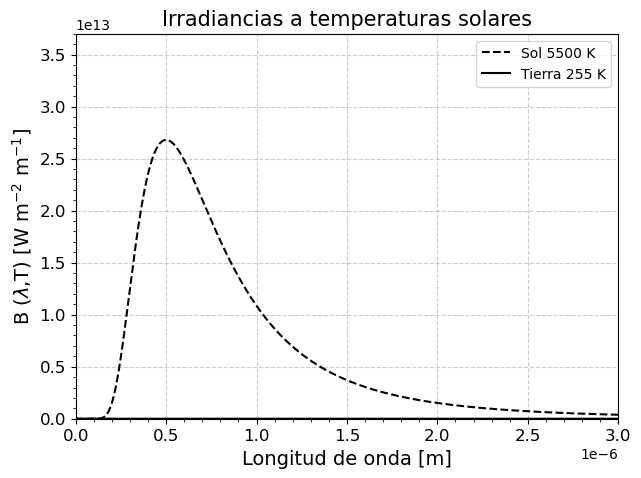

In [111]:
plt.figure(figsize=(7,5),dpi=100)
solar_B=B(lambda_vec,5796)
tierra_B=B(lambda_vec,255)
plt.plot(lambda_vec,solar_B,c='k',linestyle='--',label='Sol 5500 K')
plt.plot(lambda_vec,tierra_B,c='k',linestyle='-',label='Tierra 255 K')
lineplot_setup(0,max_lambda,xlab='Longitud de onda [m]',ylab='B ($\lambda$,T) [W m$^{-2}$ m$^{-1}$]',
               ymin=0,ymax=3.7e13,title='Irradiancias a temperaturas solares')
plt.legend()

### ¿Como le hacemos para comparar ambos gráficos?

Vemos que por alguna razón no podemos ver el de la Tierra. ¿Por qué y cómo lo resolvemos?

Una manera es normalizando los datos. Normalizar puede sugerir muchas cosas por lo que es importante ser claro, en este caso vamos a dividir todo el vector por el máximo de cada vector, es decir, si el vector es $\vec{x}$ vamos a calcular $\frac{x_i}{max\bigg(\vec{x}\bigg)}$ para cada $x_i$ en $x$. 

Para calcular el máximo valor de un arreglo de numpy ya vimos que podemos utilizar `np.max`, pero en este caso utilizaremos `np.nanmax`, cuya única diferencia es que no se deja engañar por valores infinitos o no definidos. En Python, el acrónimo NaN significa ¨not a number (nan)"o sea que no es un número bien definido. Nuestros vectores de irradiancia resulta que tienen valores no definidos, ¿por qué? y ¿dónde?

De esta manera en las líneas siguientes es donde normalizamos:

```{python}
solar_B=solar_B/np.nanmax(solar_B)
tierra_B=tierra_B/np.nanmax(tierra_B)
```

/tmp/ipykernel_7314/1359551474.py:25: RuntimeWarning: divide by zero encountered in divide
  term1=2*h*(c**2)/(lambda_array**5)
/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: divide by zero encountered in divide
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: overflow encountered in exp
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
/tmp/ipykernel_7314/1359551474.py:27: RuntimeWarning: invalid value encountered in multiply
  B=term1*term2


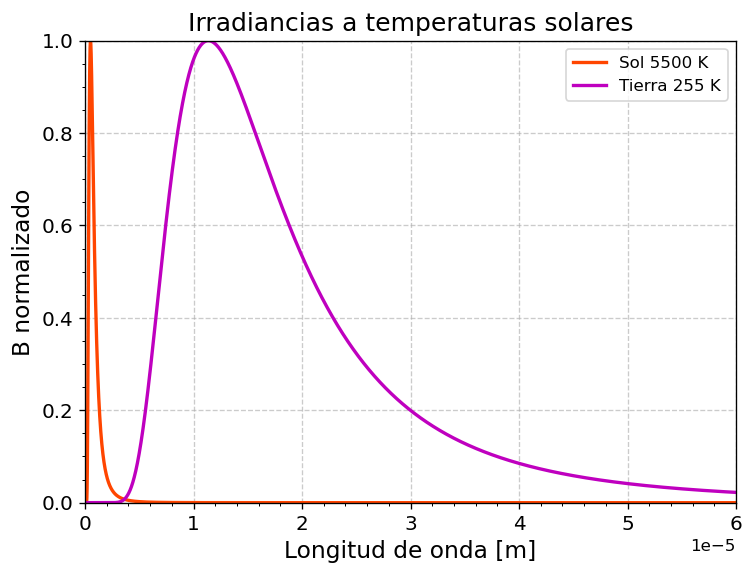

In [112]:
plt.figure(figsize=(7,5),dpi=120)
# maxima longitud de onda = 100 micrometers
max_lambda=6e-5
# creacion de arreglo de longitud de onda
lambda_vec=np.arange(0,max_lambda,resolution)

solar_B=B(lambda_vec,5796)
tierra_B=B(lambda_vec,255)

# normalizando 
solar_B=solar_B/np.nanmax(solar_B)
tierra_B=tierra_B/np.nanmax(tierra_B)

plt.plot(lambda_vec,solar_B,c='orangered',linestyle='-',linewidth=2,label='Sol 5500 K')
plt.plot(lambda_vec,tierra_B,c='m',linestyle='-',label='Tierra 255 K',linewidth=2)
lineplot_setup(0,max_lambda,xlab='Longitud de onda [m]',ylab='B normalizado',
               ymin=0,ymax=1,title='Irradiancias a temperaturas solares')
plt.legend()

Ya hemos normalizado en el eje vertical, que ahora va de 0 a 1, pero el eje x se ve todavía un poco deforme. Físicamente esto tiene una interpretación que veremos a continuación pero cómo podemos mejorar el eje x. 

Un último retoque a la gráfica puede hacer que se vean mejores los dos espectros. Para esto podemos hacer logarítmico el eje, es decir que las diferencias aunque sean de órdenes de magnitud entre uno y otro espectro se verán más pequeñas. Hay diferentes maneras de hacer esto, una es con `ax.set_xscale('log')` y otra desde que dibujan las líneas indicar que el eje x es logarítmico, para esto se usa `plt.semilogx` en lugar de `plt.plot`. 

/tmp/ipykernel_7314/1359551474.py:25: RuntimeWarning: divide by zero encountered in divide
  term1=2*h*(c**2)/(lambda_array**5)
/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: divide by zero encountered in divide
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: overflow encountered in exp
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)
/tmp/ipykernel_7314/1359551474.py:27: RuntimeWarning: invalid value encountered in multiply
  B=term1*term2


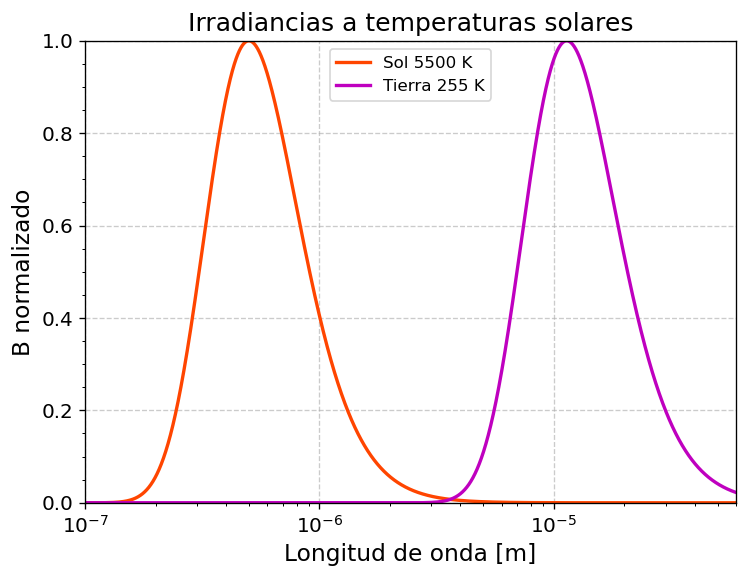

In [113]:
plt.figure(figsize=(7,5),dpi=120)
# maxima longitud de onda = 100 micrometers
max_lambda=6e-5
# creacion de arreglo de longitud de onda
lambda_vec=np.arange(0,max_lambda,resolution)

solar_B=B(lambda_vec,5796)
tierra_B=B(lambda_vec,255)

# normalizando 
solar_B=solar_B/np.nanmax(solar_B)
tierra_B=tierra_B/np.nanmax(tierra_B)

plt.semilogx(lambda_vec,solar_B,c='orangered',linestyle='-',linewidth=2,label='Sol 5500 K')
plt.semilogx(lambda_vec,tierra_B,c='m',linestyle='-',label='Tierra 255 K',linewidth=2)

lineplot_setup(10e-8,max_lambda,xlab='Longitud de onda [m]',ylab='B normalizado',
               ymin=0,ymax=1,title='Irradiancias a temperaturas solares')
plt.legend()

Otra manera de normalizar la gráfica es a través de una trampa visual, que consiste en hacer dos ejes gemelos "y". Es decir, vamos a graficar el espectro solar del lado izquierdo y el espectro terrestre del lado derecho. Para esto se utiliza la función `twinx()` que crea ejes gemelos (*twin* es gemelo en inglés). Esta función es un atributo de un objeto tipo eje de matplotlib, o sea se `matplotlib.axes.`. Veamos qué es todo esto. 

<class 'matplotlib.axes._axes.Axes'>


/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: overflow encountered in exp
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)


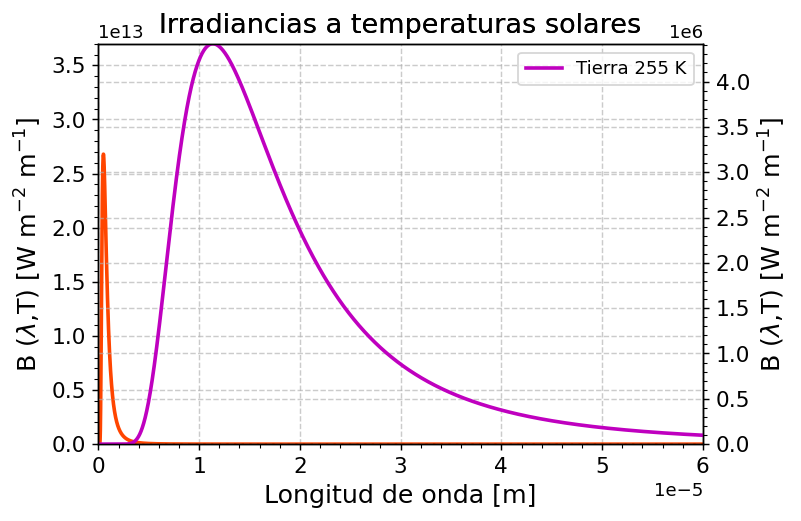

In [114]:
plt.figure(figsize=(6,4),dpi=130)
# maxima longitud de onda = 100 micrometers
max_lambda=6e-5
# creacion de arreglo de longitud de onda
lambda_vec=np.arange(1e-10,max_lambda,resolution)

solar_B=B(lambda_vec,5796)
tierra_B=B(lambda_vec,255)

plt.plot(lambda_vec,solar_B,c='orangered',linestyle='-',linewidth=2,label='Sol 5500 K')
print(type(plt.gca()))
lineplot_setup(0,max_lambda,xlab='Longitud de onda [m]',ylab='B ($\lambda$,T) [W m$^{-2}$ m$^{-1}$]',
           ymin=0,ymax=3.7e13,title='Irradiancias a temperaturas solares')
ax2=plt.gca().twinx()
ax2.plot(lambda_vec,tierra_B,c='m',linestyle='-',label='Tierra 255 K',linewidth=2)
lineplot_setup(0,max_lambda,xlab='Longitud de onda [m]',ylab='B ($\lambda$,T) [W m$^{-2}$ m$^{-1}$]',
               ymin=0,ymax=np.nanmax(tierra_B),title='Irradiancias a temperaturas solares')
plt.legend()

Habiendo normalizado la gráfica es nuestro primer momento de verdadera interpretación física. Para esto buscaremos contestar las siguientes preguntas:

1. ¿Por qué el espectro de la Tierra es más pequeño en magnitud?
2. ¿Por qué, una vez normalizado, es más ancho?
3. ¿Entonces al final cuál tiene más energía? ¿Por qué?
4. ¿Qué nos dice el espectro sobre las características de la radiación solar y terrestre?

## Interpretación

Algo que nos podría ayudar, sería calcular la cantidad de radiación total que emana de ambos cuerpos. Para hacer esto podemos usar la ley de Stefan Boltzmann, que nos dice que la suma de la radiación cuantizada $B$ para cada número de onda nos da el total de energía radiante. Es decir:

\begin{align}
E=\pi \int_0^\infty B_\lambda d\lambda = \sigma T^4. 
\end{align}

donde la constante de Stefan Boltzmann ($\sigma$) tiene un valor de 5.67037$\times$10$^{-8}$ W m$^{-2}$.

¿Cómo podríamos demostrar numéricamente que ambas expresiones para $E$ son iguales? 

Primero que nada vamos a hacer una función para la ley de Stefan Boltzmann tal cual la conocemos:

In [115]:
def StefanB(T):
    sigma=5.67037e-8
    return sigma*(T**4)
T_Tierra=255
T_Sol=5796
E_Tierra=StefanB(T_Tierra)
E_Sol=StefanB(T_Sol)
print(E_Sol,E_Tierra)

63991885.30350739 239.7574549648125


En esta última celda, calculamos e imprimimos la energía total radiante para la temperatura de equilibrio de la Tierra y la temperatura de la fotosfera solar. 

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 3 - Graficar la energía como función de la Temperatura </font>**

<font color="DarkBlue">1. Grafique la energía radiante total como función de la temperatura para un rango de temperatura terrestre, más o menos de -40$^\circ$C a 40$^\circ$C.

---

Ahora que tenemos una expresión para la ley de Stefan Boltzmann, podemos pasar a la parte interesante de la pregunta que queremos contestar, que es cómo demostramos que la integral de la función de Planck nos lleva a la ecuación de la ley de Stefan Boltzmann. 

Para esto, tenemos que integrar la función de Planck pero ¿cómo integramos en Python? 


## Integración numérica

La integración numérica es esencial en Ciencias de la Tierra debido a la naturaleza frecuentemente compleja de los conjuntos de datos geofísicos y geoespaciales. En campos como la hidrología, la meteorología y la geofísica, se encuentran datos que representan fenómenos continuos y variaciones espacio-temporales. La capacidad de calcular áreas bajo curvas, volumen de terrenos, o flujos de datos a lo largo del tiempo, es crucial para entender y modelar fenómenos geofísicos. Python, con sus bibliotecas numéricas como *NumPy* y *SciPy*, proporciona herramientas poderosas para realizar integración numérica de manera eficiente y precisa. Estas técnicas permiten la $\textbf{aproximación}$ de integrales definidas y son fundamentales en la resolución de ecuaciones diferenciales que modelan fenómenos geofísicos complejos.

Una integral es una suma infinita de números por lo que una integral numérica es una aproximación de la suma infinita a través de una suma finita. 

Regresemos a las clases de preparatoria donde la integral es el área bajo la curva. En particular, 

\begin{align}
A=\int_a^b f(x)\, dx
\end{align}

es el área de la función $f(x)$ entre $a$ y $b$. 

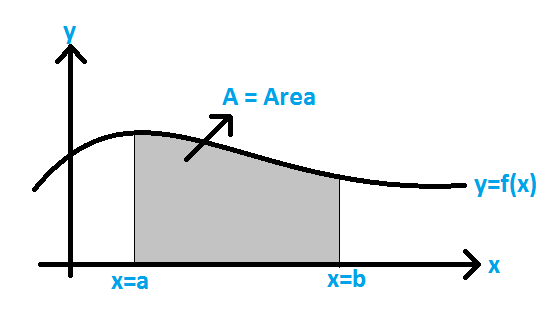

Bueno, pues el área bajo la curva puede ser aproximada numéricamente. Para esto es útil dibujar alguna figura geométrica debajo de ella, por ejemplo, rectángulos. 


### Ejercicio en clase 

1. Calcular la integral de la función f(x)=x^2 en el intervalo [-2,2] utilizando el mètodo de rectángulos donde cada rectángulo tenga un intervalo en $x$ de 1 unidad. 

### Método de trapecio

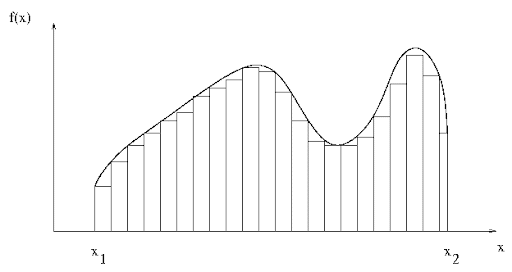

Como vemos los rectangulos dejan un espacio vacío relativemente grande entre la curva que queremos integrar y nuestra aproximación geométrica tal vez no sea muy buena si vamos dejando tanto espacio entre la curva y nuestra área aproximada. 

¿Cómo podríamos hacer nuestra aproximación mejor?

1. Hacer muchos rectángulos, i.e., aumenta la resolución. 
2. Cambiar de figura geométrica. 

Uno de los métodos fundamentales de integración numérica es el método de los trapecios, que aproxima la integral definida dividiendo el área bajo una curva en múltiples trapecios y sumando sus áreas individuales. 
Por ejemplo, para el caso de la figura siguiente, podemos ver directamente que este método probablemente mejore sustancialmente la aproximación. 

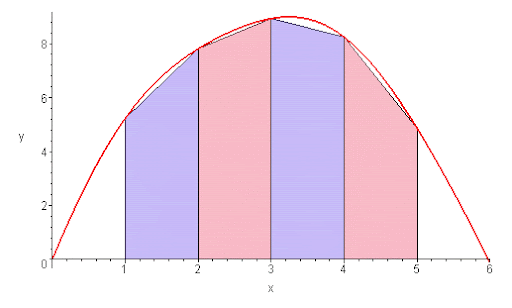

Vemos que si utilizamos un trapecio el espacio en blanco, donde nuestra aproximación falla, se vuelve más pequeño.

Conceptualmente, este método se basa en la idea de aproximar la función por segmentos lineales, tomando la forma de trapecios. Cada trapecio abarca un pequeño intervalo de la variable independiente, y la suma de estos trapecios proporciona una aproximación de la integral total. El método de los trapecios es simple de entender y aplicar, especialmente para funciones continuas, y su implementación en *NumPy* es sencilla a través de la función `np.trapz` que toma como argumentos primero a $f(x)$ y luego al vector $x$. 

Regresemos a definir nuestro vector de $\lambda$ para luego obtener los resultados integrando. 

In [116]:
max_lambda=6e-4
resolution=1e-9
# creacion de arreglo de longitud de onda
lambda_vec=np.arange(1e-11,max_lambda,resolution)

#calculamos la funcion de Planck
solar_B=B(lambda_vec,T_Sol)
tierra_B=B(lambda_vec,T_Tierra)

# ahora tenemos que integrar y multiplicar por pi.
print(np.pi*np.trapz(solar_B,lambda_vec))
print(np.pi*np.trapz(tierra_B,lambda_vec))


64000623.639886774
239.78031759973658


/tmp/ipykernel_7314/1359551474.py:26: RuntimeWarning: overflow encountered in exp
  term2=1/(np.exp(((h*c)/(k*T*lambda_array)))-1)


Si revisamos los resultados anteriores comparados con este, son muy parecidos, ¿cierto?

Podemos aprender a usar otro método. Para esto vamos a traer a la escena a otra librería. Scipy es una librería utilizada en la rama STEM (Ciencias, Tecnología, Ingeniería, etc) para el cómputo científico. Entre sus muchas, realmente muchas, funciones y clases hay una que se especializa en integrar `scipy.integrate`. Dentro de esta clase hay varios métodos de integración, incluido el método de Simpson. 

Este método es más preciso porque ya no usa figuras que utilizan ecuaciones lineales sino que utiliza polinomios. Hay diferentes versiones del método de Simpson pero la versión más fácil se puede escribir como: 

\begin{align}
  \int_a^b f(x)\, dx
  &\approx \frac{b - a}{6} \left[f(a) + 4f\left(\frac{a + b}{2}\right) + f(b)\right]\\
  &= \frac{1}{3} h\left[f(a) + 4f\left(a + h\right) + f(b)\right],
\end{align}

donde $h$ es el intervalo, o resolución, con la que vamos a integrar, $a$ y $b$ son los límites inferior y superior de integración, respectivamente y .

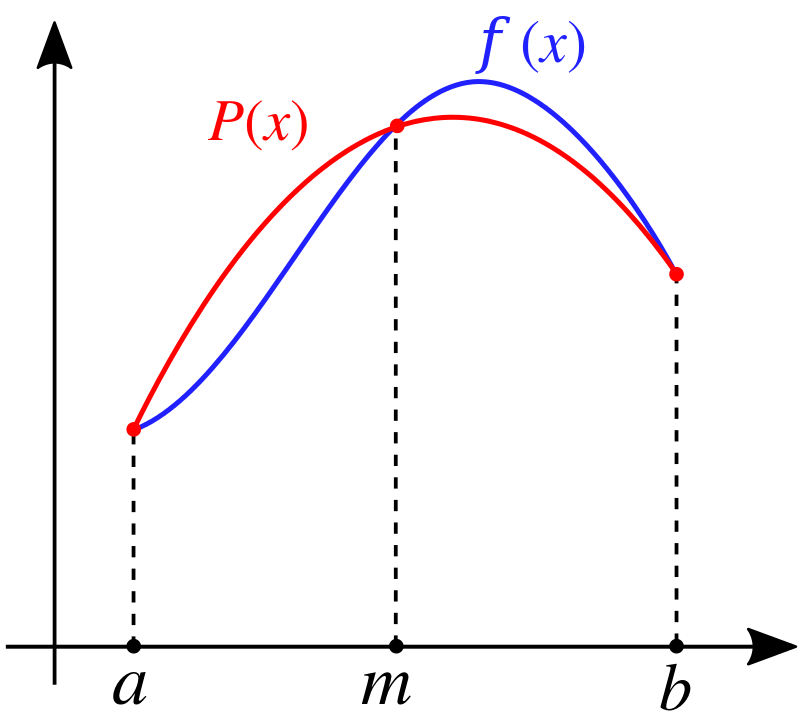


Referencias del método de Simpson:

- [Documentacion oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html).

- [Video](https://www.youtube.com/watch?v=rBq0t-79rr0)



In [117]:
def jorge_simpson(f,a,b,h):
    n_intervalos=int((b-a)/h)
    xi=a
    print(n_intervalos)
    dxs=np.arange(a,b,h)
    area=0
    for i in range(0,n_intervalos,2):
        aprox= (h/3)*(f(xi)+4*f(xi+h)+f(xi+2*h))
        area=area+aprox
        xi=xi+2*h
    print(area)
    return area

#probamos en  nuestra funcion del ejercicio
def fx(x):
    return x**2
jorge_simpson(fx,-2,2,1)

4
5.333333333333333


5.333333333333333

Ahora ya sólo nos falta aprender a usar la función de scipy para el método de simpson. En la librería de scipy, este método se encuentra en el método de integrate. Esta función `scipy.integrate.simpson` requiere de dos argumentos, primero $f(x)$ y luego $x$. En nuestro caso esto es $B(\lambda)$ y luego $\lambda$.

In [118]:
from scipy import integrate
E_simpson_Sol = integrate.simpson(solar_B,lambda_vec)
print(np.pi*E_simpson_Sol)

64000623.63988683


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 4 - Integral de Planck </font>**

<font color="DarkBlue">1.Use el método de Simpson para calcular la integral de la función de Planck para el espectro de un cuerpo con la temperatura de Venus 464$^\circ$C. 

---
